In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import requests
import yfinance as yf

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , explained_variance_score , r2_score
from sklearn.metrics import mean_poisson_deviance , mean_gamma_deviance , accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
btc_data = yf.download('BTC-USD',interval='15m', period='1mo')

/tmp/ipython-input-7-1872627716.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_data = yf.download('BTC-USD',interval='15m', period='1mo')
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(btc_data.head())

Price                              Close           High            Low  \
Ticker                           BTC-USD        BTC-USD        BTC-USD   
Datetime                                                                 
2025-06-30 10:45:00+00:00  107648.046875  107648.046875  107624.703125   
2025-06-30 11:00:00+00:00  107722.656250  107724.195312  107647.531250   
2025-06-30 11:15:00+00:00  107873.523438  107896.937500  107729.281250   
2025-06-30 11:30:00+00:00  107815.640625  107969.726562  107815.640625   
2025-06-30 11:45:00+00:00  107674.062500  107868.695312  107674.062500   

Price                               Open      Volume  
Ticker                           BTC-USD     BTC-USD  
Datetime                                              
2025-06-30 10:45:00+00:00  107631.242188           0  
2025-06-30 11:00:00+00:00  107656.937500  1025839104  
2025-06-30 11:15:00+00:00  107729.281250    74629120  
2025-06-30 11:30:00+00:00  107875.632812  1333178368  
2025-06-30 11:45:00+00

In [ ]:
print('Total number of days present in the dataset: ',btc_data.shape[0])
print('Total number of fields present in the dataset: ',btc_data.shape[1])

Total number of days present in the dataset:  2881
Total number of fields present in the dataset:  5


In [ ]:
btc_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,
2025-06-30 10:45:00+00:00,107648.046875,107648.046875,107624.703125,107631.242188,0
2025-06-30 11:00:00+00:00,107722.656250,107724.195312,107647.531250,107656.937500,1025839104
2025-06-30 11:15:00+00:00,107873.523438,107896.937500,107729.281250,107729.281250,74629120
2025-06-30 11:30:00+00:00,107815.640625,107969.726562,107815.640625,107875.632812,1333178368
2025-06-30 11:45:00+00:00,107674.062500,107868.695312,107674.062500,107819.601562,276860928


In [ ]:
btc_data.shape

(2881, 5)

In [ ]:
btc_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,
2025-07-30 09:45:00+00:00,118198.593750,118198.593750,118041.937500,118042.875000,1177657344
2025-07-30 10:00:00+00:00,118328.250000,118331.890625,118155.820312,118155.820312,989810688
2025-07-30 10:15:00+00:00,118298.968750,118327.453125,118259.359375,118319.914062,2239082496
2025-07-30 10:30:00+00:00,118388.359375,118418.554688,118299.921875,118299.921875,4251123712
2025-07-30 10:45:00+00:00,118375.390625,118402.468750,118375.390625,118402.468750,1071517696


In [ ]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2881 entries, 2025-06-30 10:45:00+00:00 to 2025-07-30 10:45:00+00:00
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   2881 non-null   float64
 1   (High, BTC-USD)    2881 non-null   float64
 2   (Low, BTC-USD)     2881 non-null   float64
 3   (Open, BTC-USD)    2881 non-null   float64
 4   (Volume, BTC-USD)  2881 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 135.0 KB


In [ ]:
btc_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,2881.000000,2881.000000,2881.000000,2881.000000,2.881000e+03
mean,114906.245395,114999.384000,114808.494745,114904.206935,1.333908e+09
std,4752.767727,4769.168183,4735.521948,4754.160671,3.934703e+09
min,105404.992188,105440.414062,105159.734375,105409.757812,0.000000e+00
25%,109114.242188,109182.382812,109032.875000,109118.132812,1.162445e+08
50%,117635.617188,117744.273438,117525.617188,117639.265625,8.104612e+08
75%,118391.132812,118489.054688,118294.585938,118389.890625,1.202692e+09
max,122940.179688,123077.632812,122757.421875,122884.492188,4.813039e+10


In [ ]:
print('Null Values: ', btc_data.isnull().values.sum())

Null Values:  0


In [ ]:
print('NA value:',btc_data.isnull().values.any())

NA value: False


In [ ]:
print(btc_data.columns)

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


In [ ]:
print(btc_data.columns.tolist())

[('Close', 'BTC-USD'), ('High', 'BTC-USD'), ('Low', 'BTC-USD'), ('Open', 'BTC-USD'), ('Volume', 'BTC-USD')]


In [ ]:
btc_data['Datetime'] = pd.to_datetime(btc_data.index, format='%Y-%m-%d %H:%M:%S')
btc_data.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Datetime']

In [ ]:
print(btc_data.head())

                                    Open           High            Low  \
Datetime                                                                 
2025-06-30 10:45:00+00:00  107648.046875  107648.046875  107624.703125   
2025-06-30 11:00:00+00:00  107722.656250  107724.195312  107647.531250   
2025-06-30 11:15:00+00:00  107873.523438  107896.937500  107729.281250   
2025-06-30 11:30:00+00:00  107815.640625  107969.726562  107815.640625   
2025-06-30 11:45:00+00:00  107674.062500  107868.695312  107674.062500   

                                   Close      Volume                  Datetime  
Datetime                                                                        
2025-06-30 10:45:00+00:00  107631.242188           0 2025-06-30 10:45:00+00:00  
2025-06-30 11:00:00+00:00  107656.937500  1025839104 2025-06-30 11:00:00+00:00  
2025-06-30 11:15:00+00:00  107729.281250    74629120 2025-06-30 11:15:00+00:00  
2025-06-30 11:30:00+00:00  107875.632812  1333178368 2025-06-30 11:30:00+00:

In [ ]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2881 entries, 2025-06-30 10:45:00+00:00 to 2025-07-30 10:45:00+00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Open      2881 non-null   float64            
 1   High      2881 non-null   float64            
 2   Low       2881 non-null   float64            
 3   Close     2881 non-null   float64            
 4   Volume    2881 non-null   int64              
 5   Datetime  2881 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 157.6 KB


In [ ]:
closedf1 = btc_data[['Datetime','Close']]

In [ ]:
closedf1.shape

(2881, 2)

In [ ]:
fig = px.line(closedf1 , x=closedf1.Datetime , y=closedf1.Close,labels={'date':'Data','close': 'Close Price'})
fig.update_traces(marker_line_width=2 , opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='1 Month data',plot_bgcolor='white',
                  font_size=12, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = btc_data[['Datetime','Close','Open','High','Low']]

In [ ]:
import warnings
warnings.filterwarnings('ignore')
closedf['Open'] = closedf['Close'].shift(1)
closedf['High'] = closedf['Close'] * (1 + np.random.uniform(0, 0.01, len(closedf)))  # Close + random %
closedf['Low'] = closedf['Close'] * (1 - np.random.uniform(0, 0.01, len(closedf)))  # Close - random %
closedf['Open'].fillna(closedf['Close'], inplace=True)

fig = go.Figure(data=[go.Candlestick(x=closedf['Datetime'],
                                     open=closedf['Open'],
                                     high=closedf['High'],
                                     low=closedf['Low'],
                                     close=closedf['Close'])])


fig.update_layout(title_text='1 Month Data - Candlestick Chart', plot_bgcolor='white',
                  font_size=12, font_color='black',
                  xaxis_title='Datetime', yaxis_title='Price')

# Removing grid lines for a cleaner look
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the figure
fig.show()

In [ ]:
del closedf1['Datetime']
scaler=MinMaxScaler(feature_range=(0,1))
closedf1=scaler.fit_transform(np.array(closedf1).reshape(-1,1))
print(closedf1.shape)

(2881, 1)


In [ ]:
closedf1

array([[0.1271255 ],
       [0.12859593],
       [0.13273583],
       ...,
       [0.73878984],
       [0.73764578],
       [0.74351407]])

In [ ]:
training_size=int(len(closedf1)*0.60)
test_size=len(closedf1)-training_size
train_data,test_data=closedf1[0:training_size,:],closedf1[training_size:len(closedf1),:1]
print("train_data:", train_data.shape)
print("test_data:", test_data.shape)

train_data: (1728, 1)
test_data: (1153, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1712, 15)
y_train: (1712,)
X_test: (1137, 15)
y_test: (1137,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (1712, 15, 1)
X_test: (1137, 15, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(None, 1), activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(50, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1207 - val_loss: 0.0028
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0076 - val_loss: 0.0026
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0076 - val_loss: 5.2508e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0053 - val_loss: 0.0011
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0048 - val_loss: 5.8834e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0047 - val_loss: 5.1838e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0048 - val_loss: 7.7434e-04
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0041 - val_loss: 9.2569e-04
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - val_loss: 6.1588e-04
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0038 - val_loss: 6.0050e-04
Epoch 12/100
54/54 ━━━━━

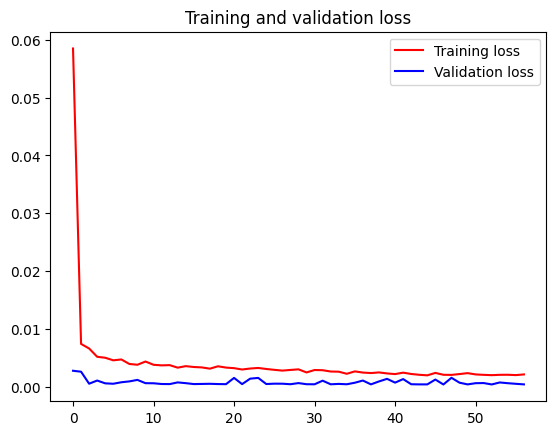

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r',label='Training loss')
plt.plot(epochs, val_loss, 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


((1712, 1), (1137, 1))

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
print("Train data RMSE:",math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE:" , mean_squared_error(original_ytrain,train_predict))
print("Train data MAE :", mean_absolute_error(original_ytrain,train_predict))

print("Test data RMSE:",math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE:", mean_squared_error(original_ytest,test_predict))
print("Test data MAE:", mean_absolute_error(original_ytest,test_predict))

Train data RMSE: 389.9966541360669
Train data MSE: 152097.390237327
Train data MAE : 268.01438376168227
Test data RMSE: 352.3356789300501
Test data MSE: 124140.43064709935
Test data MAE: 259.9893771987687


In [ ]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))


Train data explained variance regression score: 0.9942368388776562
Test data explained variance regression score: 0.8265684579945705


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9940490621533177
Test data R2 score: 0.8219068353686465


In [ ]:
print("Train data MGD:", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD:", mean_gamma_deviance(original_ytest, test_predict))

print("Train data MPD:", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD:", mean_poisson_deviance(original_ytest , test_predict))

Train data MGD: 1.1376824178801388e-05
Test data MGD: 8.93047890001124e-06
Train data MPD: 1.31422892389767
Test data MPD: 1.05287568665055


In [ ]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data:", trainPredictPlot.shape)

Train predicted data: (2881, 1)


In [ ]:
testPredictPlot = np.empty_like(closedf1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf1)-1, :] = test_predict
print("Test predicted data:", testPredictPlot.shape)

Test predicted data: (2881, 1)


In [ ]:
name = cycle(['Original close price','Train predicted close price','Test predicted close price'])

In [ ]:
print(f"Length of 'Datetime': {len(closedf['Datetime'])}")
print(f"Length of 'original_close': {len(closedf['Close'])}")
print(f"Length of 'trainPredictPlot': {len(trainPredictPlot)}")
print(f"Length of 'testPredictPlot': {len(testPredictPlot)}")


trainPredictPlot_padded = np.pad(trainPredictPlot, (0, len(closedf['Datetime']) - len(trainPredictPlot)), mode='constant', constant_values=np.nan)
testPredictPlot_padded = np.pad(testPredictPlot, (0, len(closedf['Datetime']) - len(testPredictPlot)), mode='constant', constant_values=np.nan)

plotdf = pd.DataFrame({
    'Datetime': closedf['Datetime'],
    'original_close': closedf['Close'],
    'train_predicted_close': trainPredictPlot_padded.tolist(),
    'test_predicted_close': testPredictPlot_padded.tolist()
})

print(plotdf.head())

Length of 'Datetime': 2881
Length of 'original_close': 2881
Length of 'trainPredictPlot': 2881
Length of 'testPredictPlot': 2881
                                           Datetime  original_close  \
Datetime                                                              
2025-06-30 10:45:00+00:00 2025-06-30 10:45:00+00:00   107631.242188   
2025-06-30 11:00:00+00:00 2025-06-30 11:00:00+00:00   107656.937500   
2025-06-30 11:15:00+00:00 2025-06-30 11:15:00+00:00   107729.281250   
2025-06-30 11:30:00+00:00 2025-06-30 11:30:00+00:00   107875.632812   
2025-06-30 11:45:00+00:00 2025-06-30 11:45:00+00:00   107819.601562   

                          train_predicted_close test_predicted_close  
Datetime                                                              
2025-06-30 10:45:00+00:00                 [nan]                [nan]  
2025-06-30 11:00:00+00:00                 [nan]                [nan]  
2025-06-30 11:15:00+00:00                 [nan]                [nan]  
2025-06-30 11:30:0

In [ ]:
plotdf = pd.DataFrame({'Datetime': closedf['Datetime'],
                       'original_close': closedf['Close'],
                       'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

In [ ]:
fig = px.line(plotdf,x=plotdf['Datetime'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                              plotdf['test_predicted_close']],
              labels={'valu':'BTC price','Datetime' : 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white',font_size=15,font_color='black',legend_title_text='Close price')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = x_input[0].tolist()  # Flatten the input once

lst_output = []
n_steps = time_step
i = 0
pred_intervals = 50

# Loop to predict next intervals
while i < pred_intervals:
    if len(temp_input) > time_step:
        # Use only the last `n_steps` inputs
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1))
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))

    # Predict and update
    yhat = model.predict(x_input, verbose=0)

    # Add prediction to output
    lst_output.append(yhat[0][0])

    # Update temp_input list
    temp_input.append(yhat[0][0])

    i += 1  # Correct the counter increment

print(f"Output of predicted next 32 intervals: {len(lst_output)}")

Output of predicted next 32 intervals: 50


In [ ]:
last_hours=np.arange(1,time_step+1)
pred_hours=np.arange(time_step+1,time_step+pred_intervals+1)
print(last_hours)
print(pred_hours)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65]


In [ ]:
# Assuming `last_hours` is a list or array and `pred_hours` is a scalar
if isinstance(pred_hours, (list, np.ndarray)):
    pred_hours = pred_hours[0]  # Extract the first element if it's an array or list

temp_mat = np.empty((int(len(last_hours)) + int(pred_hours) + 1, 1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1, -1).tolist()[0]



last_original_hour_value = temp_mat
next_predicted_days_value = temp_mat

last_original_hour_value[0:time_step+1] = scaler.inverse_transform(closedf1[len(closedf1)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_hour_value':last_original_hour_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 candles close price' , 'Predicted next 32 candles '])
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_hour_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'BTC price' , 'index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 min vs next 32 15 min',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()